# TRABAJO FINAL

El trabajo consiste en desarrollar los modelos que vienen a continuación:

### DATAFRAME1: vinos.csv
+ Contiene el análisis quimico de diferentes tipos de vino.
+ Se solicita aplicar kmeans a fin de encontrar clusters de vinos. Tambien determinar el numero de clustes óptimo.

### DATAFRAME2: diabetes.csv
+ Contiene datos de personas que fueron diagnosticadas de diabetes (variable Outcome = 1 significa que presenta diabetes, 0 lo contrario).
+ Se pide generar un modelo de regresión (determinar si aplica regresión logística o regresión lineal) y predecir para un par de casos).

### Presentación
> **Entregable:** codigo en `R` o en `python`<br>
> **Trabajo grupal:** máximo 3 personas<br>
> **Fecha de entrega:** sab 09 de febrero 10:00 hrs

In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 8)

In [2]:
dataframe = pd.read_csv(r"diabetes.csv")
dataframe.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
dataframe.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [4]:
print(dataframe.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


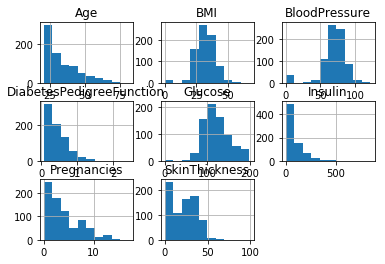

In [5]:
dataframe.drop(['Outcome'], 1).hist()
plt.show()

In [6]:
X = np.array(dataframe.drop(['Outcome'], 1))
y = np.array(dataframe['Outcome'])
# Comprobación de dimensión: 768 reg, 8 cols
X.shape

(768, 8)

In [7]:
model = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
# Comprobamos "outcome" de los 5 primeros registros
predictions = model.predict(X)
print(predictions[0:5])

[1 0 1 0 1]


In [9]:
# Precision
model.score(X, y)

0.78125

In [10]:
# Validación del modelo
# Train & Test
validation_size = 0.2
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
    X, y, test_size=validation_size, random_state=0)

predictions = model.predict(X_test)
print("Puntuación de precisión:", accuracy_score(Y_test, predictions))

Puntuación de precisión: 0.8311688311688312


## Nuevas clasificaciones:

> Los valores presentados a continuación son ficticios.<br />
> Referencia de niveles de glucosa: [Glucosa](https://i2.wp.com/insulclock.com/wp-content/uploads/2018/01/General.-Blog.-Normoglucemia@4x-1.jpg?resize=768%2C638&ssl=1) <br />
> Referencia de niveles de presión sanguinea: [Presion Sanguinea](https://newsarchive.heart.org/wp-content/uploads/2017/11/Main-HBP-SPAN-FINAL-02-928x1024.jpg)

#### Caso 1:
- **Embarazos / Pregnancies :** 3
- **Glucosa / Glucose :** 86
- **Presión arterial / BloodPressure :** 57
- **Espesor de la piel / SkinThickness :** 20
- **Insulina / Insulin :** 80
- **IMC / BMI :** 25
- **Función pedigrí de la diabetes / DiabetesPedigreeFunction :** 0.25
- **Edad / Age :** 35
- **Resultado / Outcome :** *Lo que se va a calcular*

In [11]:
X_new = pd.DataFrame({'Pregnancies': [3], 'Glucose': [86], 'BloodPressure': [57], 'SkinThickness': [20], 'Insulin': [80],
       'BMI': [25], 'DiabetesPedigreeFunction': [0.25], 'Age': [35]})
model.predict(X_new)

array([0])

#### Caso 2:
- **Embarazos / Pregnancies :** 0
- **Glucosa / Glucose :** 120
- **Presión arterial / BloodPressure :** 100
- **Espesor de la piel / SkinThickness :** 35
- **Insulina / Insulin :** 90
- **IMC / BMI :** 29.3
- **Función pedigrí de la diabetes / DiabetesPedigreeFunction :** 0.6156
- **Edad / Age :** 40
- **Resultado / Outcome :** *Lo que se va a calcular*

In [12]:
X_new2 = pd.DataFrame({'Pregnancies': [0], 'Glucose': [120], 'BloodPressure': [100], 'SkinThickness': [35], 'Insulin': [90],
       'BMI': [29.3], 'DiabetesPedigreeFunction': [0.6156], 'Age': [40]})
model.predict(X_new2)

array([0])